<a href="https://colab.research.google.com/github/ananyadua1/VOIS_AICTE_Oct2025_Ananya_Dua/blob/main/Ananya_Dua_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df["neighbourhood"].value_counts()

,count
neighbourhood,
Bedford-Stuyvesant,7937
Williamsburg,7775
Harlem,5466
Bushwick,4982
Hell's Kitchen,3965
...,...
Rossville,3
Gerritsen Beach,3
Fort Wadsworth,2


In [8]:
df["neighbourhood"].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [9]:
df["neighbourhood"].nunique()

224

In [10]:
df[df["neighbourhood"]=="brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license


In [11]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df.drop(['house_rules' , 'license'] , axis= 1, inplace = True)

In [14]:
df.shape

(102058, 24)

In [15]:
df['price'] = df['price'].astype(str).str.replace('$' , '' , regex = False)

In [16]:
print(df['price'].dtype)


object


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          101769 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102029 non-null  object        
 6   neighbourhood                   102042 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

In [18]:
df['service fee'] = df['service fee'].astype(str).str.replace('$' , '', regex = False)

In [19]:
df['service fee'] = df['service fee'].astype(str).str.replace(',' , '', regex = False)

In [20]:
df['price'] = df['price'].astype(str).str.replace(',' , '' , regex = False)

In [21]:
df.rename(columns = {'price': 'price_$', 'service_fee': 'service_fee_$'} , inplace = True)

In [22]:
df.dropna(inplace = True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83797 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83797 non-null  int64         
 1   NAME                            83797 non-null  object        
 2   host id                         83797 non-null  int64         
 3   host_identity_verified          83797 non-null  object        
 4   host name                       83797 non-null  object        
 5   neighbourhood group             83797 non-null  object        
 6   neighbourhood                   83797 non-null  object        
 7   lat                             83797 non-null  float64       
 8   long                            83797 non-null  float64       
 9   country                         83797 non-null  object        
 10  country code                    83797 non-null  object        
 11  instan

In [24]:
df['price_$'].dtype


dtype('O')

In [25]:
df['price_$'] = df['price_$'].astype(float)

In [26]:
df['service fee'] = df['service fee'].astype(float)

In [27]:
df['id'] = df['id'].astype(float)

In [28]:
df = df.astype({
    'price_$': float,
    'service fee': float,
    'id': str
})


In [29]:
df['host id'] = df['host id'].astype(str)

In [30]:
df['last review'] = pd.to_datetime(df['last review'])

In [31]:
df['Construction year'] = df['Construction year'].astype(int)

In [32]:
df = df.drop(df[df['availability 365'] > 500].index)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [34]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


Text(0.5, 1.0, 'Property Types and their count in the dataset')

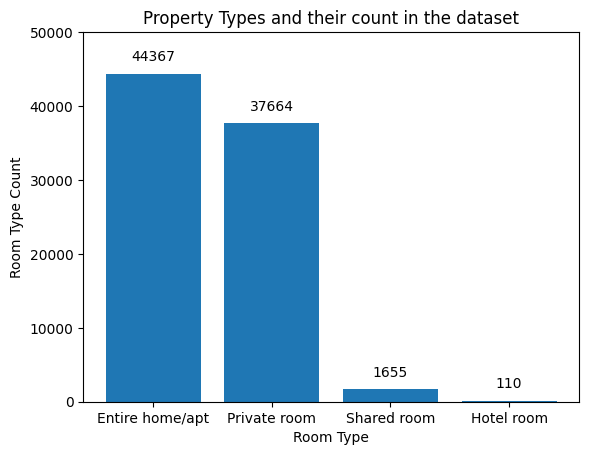

In [35]:
room_type_bar = plt.bar(property_types.index , property_types.loc[: , "count"]);
plt.bar_label(room_type_bar , labels = property_types.loc[: , "count"] , padding = 7);
plt.ylim([0,50000]);
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Types and their count in the dataset')

In [36]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34779
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821
brookln,1


Text(0.5, 1.0, 'Neighbourhood Group and their count in the dataset')

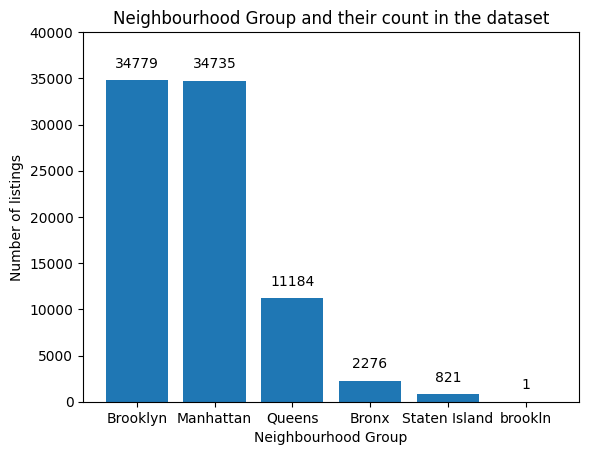

In [37]:
hood_group_bar = plt.bar(hood_group.index , hood_group.loc[: , "count"]);
plt.bar_label(hood_group_bar , labels = hood_group.loc[: , "count"] , padding = 7)
plt.ylim([0,40000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of listings')
plt.title('Neighbourhood Group and their count in the dataset')

Text(0.5, 1.0, 'Average Price of Listings in Each Neighbourhood Group')

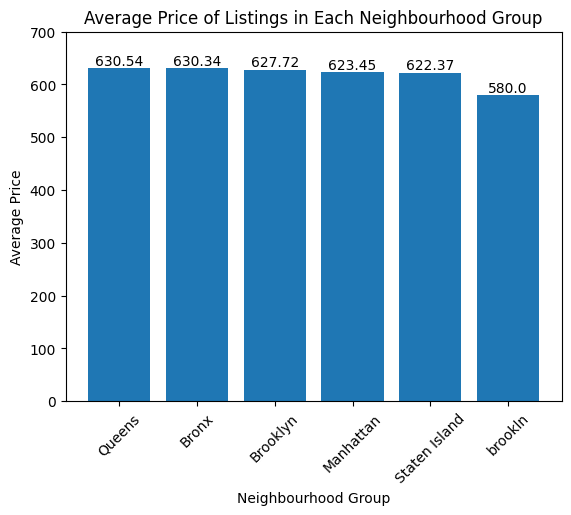

In [38]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index , avg_price.loc[: , "price_$"]);
plt.bar_label(avg_price_bar , labels = round(avg_price.loc[: , "price_$"] , 2) , label_type = 'edge' , padding = 0)
plt.ylim([0,700])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.title('Average Price of Listings in Each Neighbourhood Group')

Text(0.5, 1.0, 'Average Price for properties in each construction year')

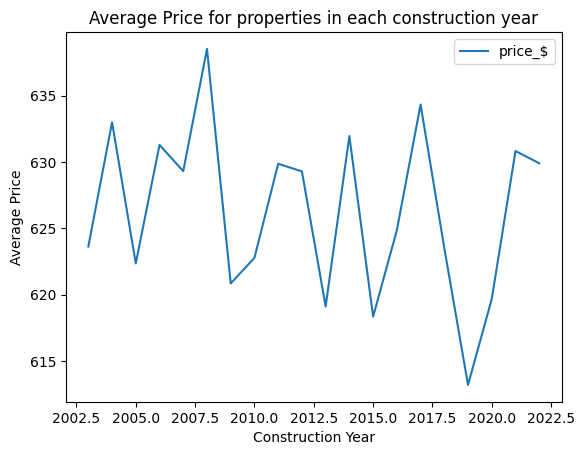

In [39]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title("Average Price for properties in each construction year")

In [40]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()

In [41]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending =  False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


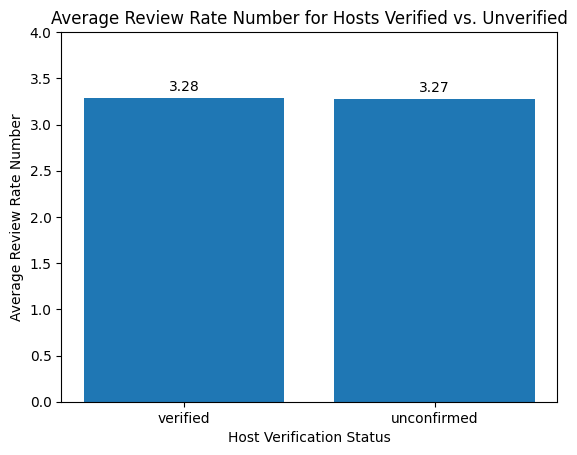

In [42]:
review_bar = plt.bar(review.index , review.loc[:,"review rate number"])
plt.bar_label(review_bar , labels = round(review.loc[:,"review rate number"],2), padding =3)
plt.ylim([0,4])
plt.xlabel('Host Verification Status')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number for Hosts Verified vs. Unverified')
plt.show()

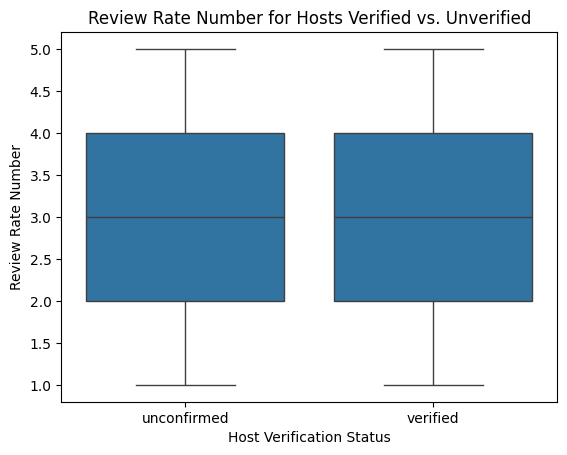

In [43]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df , x = "host_identity_verified" , y = "review rate number" , color = base_color)
plt.xlabel('Host Verification Status')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Number for Hosts Verified vs. Unverified')
plt.show()

In [44]:
df['price_$'].corr(df['service fee'])

np.float64(0.9999909082976466)

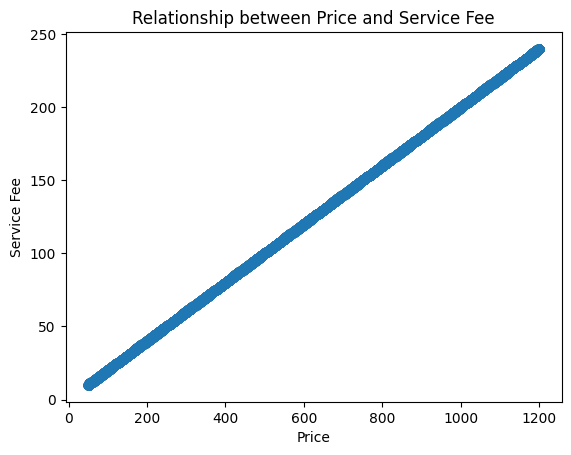

In [45]:
sns.regplot(df , x = 'price_$' , y = 'service fee')
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Relationship between Price and Service Fee')
plt.show()

In [46]:
ARRM = df.groupby(['neighbourhood group' , 'room type'])['review rate number'].mean().to_frame()
ARRM

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274729
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286
brookln             Private room               4.000000

Text(0.5, 1.0, 'Average Review Rate Number for Listings in Each Neighbourhood Group by Room Type.')

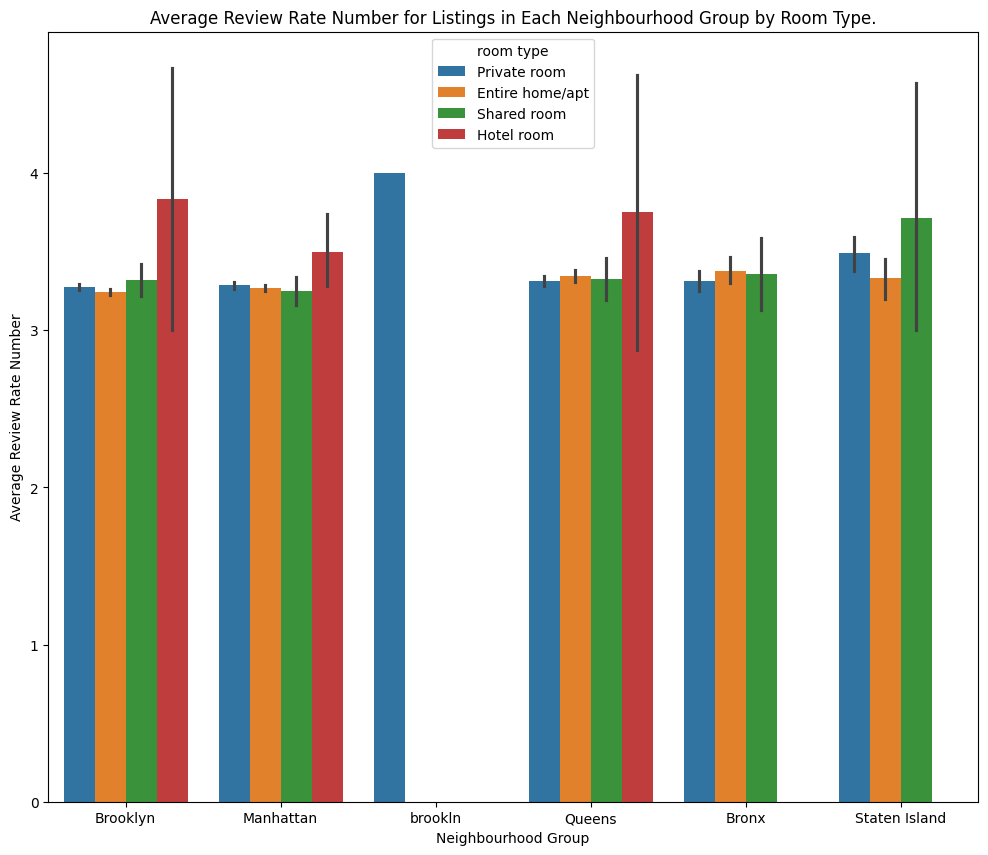

In [47]:
plt.figure(figsize = [12,10])
sns.barplot(data = df , x = 'neighbourhood group' , y = 'review rate number' , hue = 'room type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number for Listings in Each Neighbourhood Group by Room Type.')

Text(0.5, 1.0, 'Relationship between Calculated Host Listings Count and Availability 365')

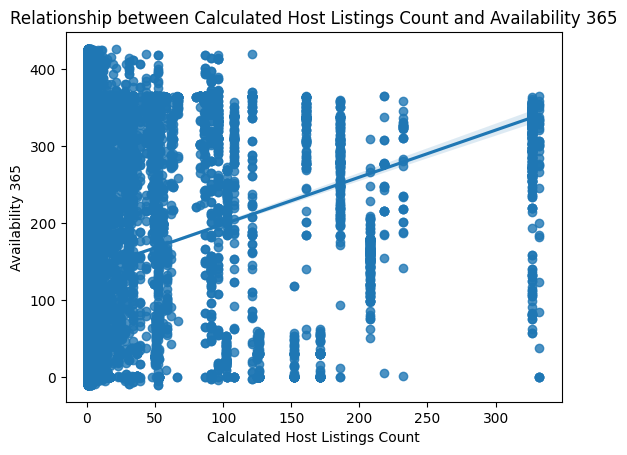

In [48]:
sns.regplot(df , x='calculated host listings count' , y = 'availability 365');
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability 365')
plt.title('Relationship between Calculated Host Listings Count and Availability 365')

In [49]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1353372562905428)